# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [139]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gmmundh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [140]:
nltk. download("punkt") 

[nltk_data] Downloading package punkt to /Users/gmmundh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [141]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [142]:
# Create a newsapi client
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)


In [143]:
# Fetch the Bitcoin news articles

bit_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)



In [144]:
# Fetch the Ethereum news articles

eth_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)



In [145]:
# Create the Bitcoin sentiment scores DataFrame
bit_sentiments = []

for article in bit_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bit_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bit_df = pd.DataFrame(bit_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bit_df = bit_df[cols]

bit_df.head()


,date,text,compound,positive,negative,neutral
0,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
1,2020-12-16,After reaching a previous all-time high on Nov...,0.6486,0.174,0.000,0.826
2,2020-12-16,Its been almost three years to the day since t...,0.4019,0.072,0.000,0.928
3,2020-12-17,Everything is dumb until it works.\r\nAs 2020 ...,0.2732,0.136,0.083,0.781
4,2020-12-29,The government of India is considering an 18% ...,-0.2924,0.000,0.059,0.941


In [146]:
# Create the Ethereum sentiment scores DataFrame

eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()



,date,text,compound,positive,negative,neutral
0,2020-12-22,The Securities and Exchange Commission plans t...,0.5267,0.136,0.000,0.864
1,2020-12-19,Bitcoin was once derided by serious investors ...,0.0772,0.066,0.085,0.849
2,2020-12-16,FILE PHOTO: A representation of virtual curren...,0.0000,0.000,0.000,1.000
3,2020-12-16,FILE PHOTO: Representations of virtual currenc...,0.0000,0.000,0.000,1.000
4,2020-12-16,FILE PHOTO: Representations of virtual currenc...,0.0000,0.000,0.000,1.000


In [147]:
# Describe the Bitcoin Sentiment
bit_df.describe()

,compound,positive,negative,neutral
count,99.000000,99.000000,99.000000,99.000000
mean,0.127270,0.052717,0.022455,0.924838
std,0.352807,0.061883,0.051517,0.074445
min,-0.946800,0.000000,0.000000,0.637000
25%,0.000000,0.000000,0.000000,0.869000
50%,0.000000,0.046000,0.000000,0.937000
75%,0.401900,0.090500,0.000000,1.000000
max,0.817300,0.233000,0.363000,1.000000


In [148]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,95.000000,95.000000,95.000000,95.000000
mean,0.245771,0.083968,0.024611,0.891442
std,0.336930,0.074194,0.042763,0.088049
min,-0.779200,0.000000,0.000000,0.688000
25%,0.000000,0.000000,0.000000,0.839500
50%,0.296000,0.072000,0.000000,0.915000
75%,0.455500,0.134000,0.054000,0.950000
max,0.877900,0.278000,0.239000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereim

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [149]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from nltk.stem import WordNetLemmatizer 


In [11]:
# Expand the default stopwords list if necessary



In [150]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words

    
    # Convert the words to lowercase
    
    
    # Remove the punctuation
    
    
    # Remove the stop words
    
    if type(text) == str:
    
        sw = set(stopwords.words('english'))
        regex = re.compile("[^a-zA-Z ]")

        re_clean = regex.sub('', text)
        words = word_tokenize(re_clean)
        output = [word.lower() for word in words if word.lower() not in sw]
    
        tokens = set(output)

    
    # Lemmatize Words into root words
    
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    else:
    
        tokens = ""

    
    return tokens

In [151]:
bit_sentiments = []

for article in bit_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        tokens = tokenizer(article["content"])
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bit_sentiments.append({
            "text": text,
            "date": date,
            "tokens": tokens,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bit_df = pd.DataFrame(bit_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "tokens", "compound", "positive", "negative", "neutral"]
bit_df = bit_df[cols]

bit_df.head()

,date,text,tokens,compound,positive,negative,neutral
0,2020-12-03,Visa has partnered with cryptocurrency startup...,"[partnered, first, extremely, blockfi, worth, ...",0.6369,0.162,0.000,0.838
1,2020-12-16,After reaching a previous all-time high on Nov...,"[reaching, high, peak, rapidly, st, th, alltim...",0.6486,0.174,0.000,0.826
2,2020-12-16,Its been almost three years to the day since t...,"[came, almost, since, hodlers, crashing, arbit...",0.4019,0.072,0.000,0.928
3,2020-12-17,Everything is dumb until it works.\r\nAs 2020 ...,"[experiencing, cryptocurrency, world, dumb, in...",0.2732,0.136,0.083,0.781
4,2020-12-29,The government of India is considering an 18% ...,"[whether, india, proposed, new, report, transa...",-0.2924,0.000,0.059,0.941


In [152]:
# Create a new tokens column for Ethereum

eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        tokens = tokenizer(article["content"])
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bit_sentiments.append({
            "text": text,
            "date": date,
            "tokens": tokens,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(bit_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "tokens", "compound", "positive", "negative", "neutral"]
eth_df = bit_df[cols]

eth_df.head()



,date,text,tokens,compound,positive,negative,neutral
0,2020-12-03,Visa has partnered with cryptocurrency startup...,"[partnered, first, extremely, blockfi, worth, ...",0.6369,0.162,0.000,0.838
1,2020-12-16,After reaching a previous all-time high on Nov...,"[reaching, high, peak, rapidly, st, th, alltim...",0.6486,0.174,0.000,0.826
2,2020-12-16,Its been almost three years to the day since t...,"[came, almost, since, hodlers, crashing, arbit...",0.4019,0.072,0.000,0.928
3,2020-12-17,Everything is dumb until it works.\r\nAs 2020 ...,"[experiencing, cryptocurrency, world, dumb, in...",0.2732,0.136,0.083,0.781
4,2020-12-29,The government of India is considering an 18% ...,"[whether, india, proposed, new, report, transa...",-0.2924,0.000,0.059,0.941


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [153]:
from collections import Counter
from nltk import ngrams

bit_list = ""

for article in bit_headlines["articles"]:
    try:
        text = article["content"]
        
        if type(text) ==str:
        
            bit_list = bit_list + text
        
    except AttributeError:
        pass


eth_list = ""

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        
        if type(text) ==str:
        
            eth_list = eth_list + text
        
    except AttributeError:
        pass


In [154]:
# Generate the Bitcoin N-grams where N=2
 
processed_bit = tokenizer(bit_list)    

bitcoins_counts = Counter(ngrams(processed_bit, n=2))


In [155]:
# Generate the Ethereum N-grams where N=2

processed_eth = tokenizer(eth_list)    

eth_counts = Counter(ngrams(processed_eth, n=2))


In [156]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=3):

    bigrams = ngrams(tokens, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))    
    
    return Counter(tokens).most_common(N)

In [157]:
# Get the top 10 words for Bitcoin

token_count(processed_bit,10)


[('peak', 2),
 ('inc', 2),
 ('day', 2),
 ('tesla', 2),
 ('stock', 2),
 ('time', 2),
 ('entrepreneur', 2),
 ('la', 2),
 ('offer', 2),
 ('representation', 2)]

In [158]:
# Get the top 10 words for Ethereum

token_count(processed_eth,10)


[('november', 2),
 ('day', 2),
 ('company', 2),
 ('investment', 2),
 ('market', 2),
 ('net', 2),
 ('help', 2),
 ('stock', 2),
 ('wallet', 2),
 ('business', 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [159]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

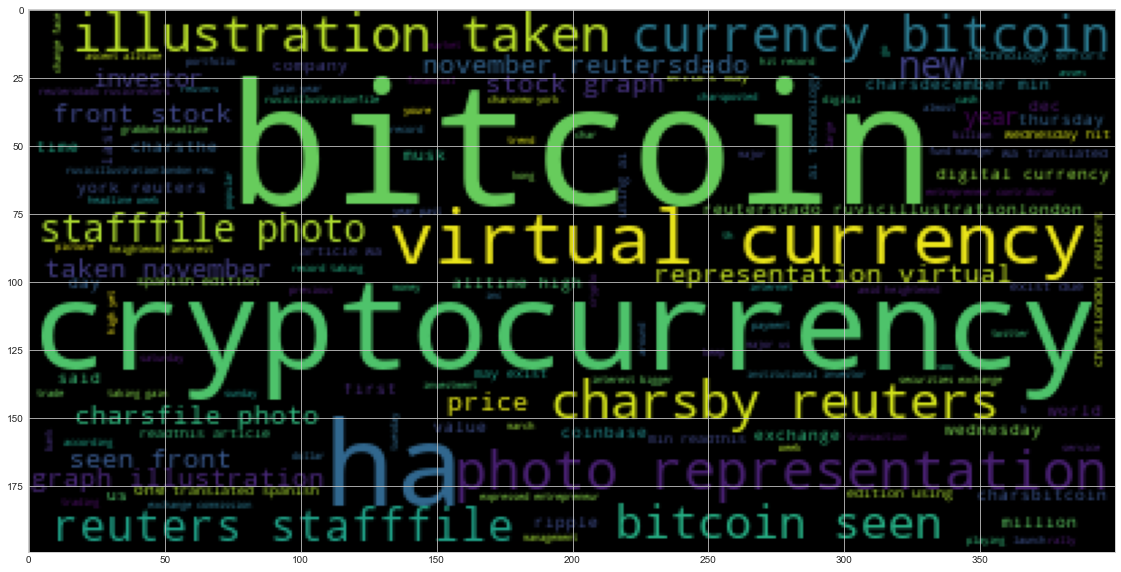

In [166]:
# Generate the Bitcoin word cloud
#bitcoin_text = token_count(processed_bit,10)

lemmatizer = WordNetLemmatizer()

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

processed_bit = process_text(bit_list)

wc = WordCloud().generate(processed_bit)
plt.imshow(wc)

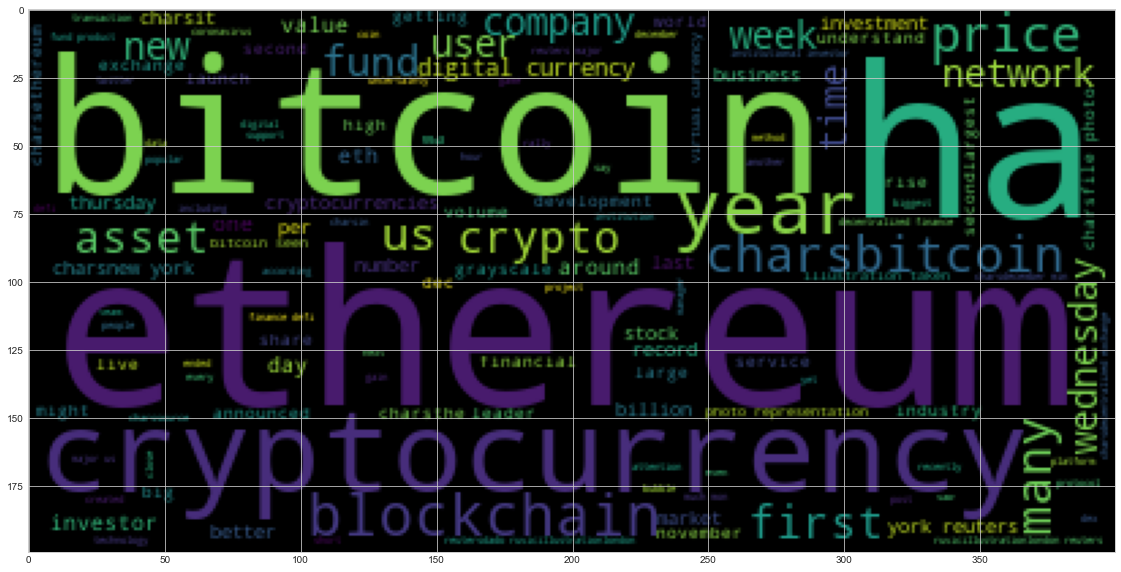

In [167]:
# Generate the Ethereum word cloud

processed_eth = process_text(eth_list)

wc = WordCloud().generate(processed_eth)
plt.imshow(wc)


---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [168]:
import spacy
from spacy import displacy

In [169]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [170]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together

bit_list




In [171]:
# Run the NER processor on all of the text

doc = nlp(bit_list)


# Add a title to the document
# YOUR CODE HERE!

In [172]:
# Render the visualization
displacy.render(doc, style='ent')

In [173]:
# List all Entities
print([ent.text for ent in doc.ents])

['Visa', 'first', 'Bitcoin', 'November 30th, 2020', 'December 1st', '2020', 'bitcoin', 'above $20,000', 'almost three years', 'the day', 'Bitcoin', '20,000', 'Wednesday', '2020', 'late-year', 'Bitcoin', 'over $23,000', 'India', '18%', 'bitcoin', 'the Times of India', 'CNN', '$30,000 mark', 'weeks', 'Saturday', 'above $33,000', 'chars]The Securities and Exchange Commission', 'digital yuan', 'the People’s Bank of China', 'Bitcoin', '20,000', '14,800', 'more than 170%', 'this year', 'chars]Six years', 'Mexico', '$62 million', 'Grayson Blackmon', 'One', 'the year', 'the day', 'Twitter', 'chars]6', '6', 'one', 'above $20,000', 'Wednesday', 'a year', 'Reuters', 'Bitcoin', 'U.S.', 'January 6, 2020', 'REUTERS/', 'Dado Ruvic/File Photo', 'LONDON', 'Reuters', 'Bitcoin', 'Reuters', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reu', 'Fergal Smith', 'Maiya Keidan', 'Reuters', 'Canadian', 'Reuters', 'LONDON', 'Dec 30', 'Reuters', 'Bitcoin', 'Wednesday', 'a record $28,599.99', 'this year', '295%', '3

---

### Ethereum NER

In [174]:
# Concatenate all of the Ethereum text together
eth_list

"The Securities and Exchange Commission plans to sue Ripple in federal civil court for selling unregistered securities, according to a news release published online by the cryptocurrency company late … [+2950 chars]Bitcoin was once derided by serious investors as a bubble or a Ponzi scheme. But this year, it has become an irresistible investment for many of them.\xa0\r\nJust this Wednesday, bitcoin topped $20,000 fo… [+5208 chars]FILE PHOTO: A representation of virtual currency Bitcoin is seen in front of a stock graph in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - Major U.S.… [+1046 chars]FILE PHOTO: Representations of virtual currency Bitcoin are seen in this picture illustration taken taken March 13, 2020. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - Major U.S. cryptocurrency… [+1031 chars]FILE PHOTO: Representations of virtual currency Bitcoin are seen in this picture illustration taken taken March 13, 2020. REUTERS/Dado

In [180]:
# Run the NER processor on all of the text
doc = nlp(eth_list)

# Add a title to the document
# YOUR CODE HERE!

In [179]:
# Render the visualization
displacy.render(doc, style='ent')

In [181]:
# List all Entities
print([ent.text for ent in doc.ents])

['The Securities and Exchange Commission', 'this year', 'Wednesday', 'bitcoin', '20,000', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reuters', 'U.S.', 'Bitcoin', 'March 13, 2020', 'REUTERS/', 'Reuters', 'U.S.', 'Bitcoin', 'March 13, 2020', 'REUTERS/', 'Reuters', 'U.S.', 'YORK', 'Reuters', '$429 million', 'the week ended Dec. 7', 'second', 'YORK', 'Reuters', '$429 million', 'the week ended Dec. 7', 'second', 'YORK', 'Reuters', '$5.6 billion', 'this year', 'more than 600%', '2019', 'Coin', '2020', 'Las Vegas', 'dozens', '3080', '15, 2020', '6 min', 'A few days ago', 'US', 'Cynthia Lummis', 'Bitcoin', 'second', 'December 2020', 'first', 'Ethereum 2.0', 'YORK', 'Reuters', 'U.S.', 'the years', 'U.S.', 'Bitcoin', 'November 19, 2020', 'REUTERS/', 'Reuters', 'Bitcoin', 'as much as 6%', 'Reuters', 'Bitcoin', 'Wednesday', 'a record $28,599.99', 'digital', 'this year', 'Bitcoin', 'chars]One day', 'RubyGems', 'two', 'bitcoin', '30,000', 'first', 'Saturday', 'the new year', 'Bitcoin', '33,136.92'

---